# Champion Analysis Prototype v1.0

*This notebook is a protoype to test the versatility of the PokeAPI for the Champion Analysis project. It is not intended to be a final product.*

In [3]:
# Dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import json
import matplotlib.pyplot as plt
from matplotlib import cm

## Data Collection and Structuring
*This chapter is dedicated to the collection and structuring of the data from the PokeAPI.*

In [4]:
# Set up dictionaries for data
pokemon_data = {
    "name": [],
    "type": [],
    "hp": [], 
    "attack": [],
    "defense": [],
    "special_attack": [],
    "special_defense": [],
    "speed": [],
}

# Loop through all Pokemon (up to Gen 8)
for i in range(1, 899):
    # Send a request to the PokeAPI
    response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{i}").json()

    # Extract the Pokemon's name
    pokemon_data["name"].append(response["name"])

    # Extract the Pokemon's types
    types = [type_info["type"]["name"] for type_info in response["types"]]
    pokemon_data["type"].append(types)

    # Extract the Pokemon's stats
    stats = {stat_info["stat"]["name"]: stat_info["base_stat"] for stat_info in response["stats"]}
    pokemon_data["hp"].append(stats.get("hp"))
    pokemon_data["attack"].append(stats.get("attack"))
    pokemon_data["defense"].append(stats.get("defense"))
    pokemon_data["special_attack"].append(stats.get("special-attack"))
    pokemon_data["special_defense"].append(stats.get("special-defense"))
    pokemon_data["speed"].append(stats.get("speed"))

# Convert the data to a pandas DataFrame
pokemon_df = pd.DataFrame(pokemon_data)

# Save the data as a CSV
pokemon_df.to_csv("Data Extract/Pokemon Dataframe.csv", index=False, header=True)


In [8]:
# Rename and restructure columns
pokemon_df = pokemon_df.rename(columns={"name": "Name", "type": "Type", "hp": "HP", "attack": "Attack", "defense": "Defense", "special_attack": "Special Attack", "special_defense": "Special Defense", "speed": "Speed"})

# Add a column for Total Stats
pokemon_df["Total Stats"] = pokemon_df["HP"] + pokemon_df["Attack"] + pokemon_df["Defense"] + pokemon_df["Special Attack"] + pokemon_df["Special Defense"] + pokemon_df["Speed"]
pokemon_df = pokemon_df[["Name", "Type", "HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed", "Total Stats"]]
pokemon_df

,Name,Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Stats
0,Bulbasaur,"[grass, poison]",45,49,49,65,65,45,318
1,Ivysaur,"[grass, poison]",60,62,63,80,80,60,405
2,Venusaur,"[grass, poison]",80,82,83,100,100,80,525
3,Charmander,[fire],39,52,43,60,50,65,309
4,Charmeleon,[fire],58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...
893,Regieleki,[electric],80,100,50,100,50,200,580
894,Regidrago,[dragon],200,100,50,100,50,80,580
895,Glastrier,[ice],100,145,130,65,110,30,580
896,Spectrier,[ghost],100,65,60,145,80,130,580


In [9]:
# Initialize a dictionary to store your data
legendary_mythical_pokemon = {
    "name": [],
    "type": [],
    "hp": [],
    "attack": [],
    "defense": [],
    "special_attack": [],
    "special_defense": [],
    "speed": [],
    "legendary": [],
    "mythical": []
}

# Loop through all Pokemon (up to Gen 8)
for i in range(1, 899):
    # Send a request to the Pokemon endpoint
    pokemon_response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{i}").json()

    # Send a request to the Pokemon Species endpoint
    species_response = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{i}").json()

    # Check if the Pokemon is legendary or mythical
    if species_response["is_legendary"] or species_response["is_mythical"]:
        # Extract the Pokemon's name
        legendary_mythical_pokemon["name"].append(pokemon_response["name"].capitalize())

        # Extract the Pokemon's types
        types = [type_info["type"]["name"] for type_info in pokemon_response["types"]]
        legendary_mythical_pokemon["type"].append(types)

        # Extract the Pokemon's stats
        stats = {stat_info["stat"]["name"]: stat_info["base_stat"] for stat_info in pokemon_response["stats"]}
        legendary_mythical_pokemon["hp"].append(stats.get("hp"))
        legendary_mythical_pokemon["attack"].append(stats.get("attack"))
        legendary_mythical_pokemon["defense"].append(stats.get("defense"))
        legendary_mythical_pokemon["special_attack"].append(stats.get("special-attack"))
        legendary_mythical_pokemon["special_defense"].append(stats.get("special-defense"))
        legendary_mythical_pokemon["speed"].append(stats.get("speed"))

        # Add the Pokemon's legendary and mythical status
        legendary_mythical_pokemon["legendary"].append(species_response["is_legendary"])
        legendary_mythical_pokemon["mythical"].append(species_response["is_mythical"])

# Convert the data to a pandas DataFrame
legendary_mythical_pokemon_df = pd.DataFrame(legendary_mythical_pokemon)


In [10]:
# Rename and restructure columns
legendary_mythical_pokemon_df = legendary_mythical_pokemon_df.rename(columns={"name": "Name", "type": "Type", "hp": "HP", "attack": "Attack", "defense": "Defense", "special_attack": "Special Attack", "special_defense": "Special Defense", "speed": "Speed", "legendary": "Legendary", "mythical": "Mythical"})
legendary_mythical_pokemon_df = legendary_mythical_pokemon_df[["Name", "Type", "HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed", "Legendary", "Mythical"]]

# Add a column for Total Stats
legendary_mythical_pokemon_df["Total Stats"] = legendary_mythical_pokemon_df["HP"] + legendary_mythical_pokemon_df["Attack"] + legendary_mythical_pokemon_df["Defense"] + legendary_mythical_pokemon_df["Special Attack"] + legendary_mythical_pokemon_df["Special Defense"] + legendary_mythical_pokemon_df["Speed"]
legendary_mythical_pokemon_df = legendary_mythical_pokemon_df[["Name", "Type", "HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed", "Total Stats", "Legendary", "Mythical"]]
legendary_mythical_pokemon_df

,Name,Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Stats,Legendary,Mythical
0,Articuno,"[ice, flying]",90,85,100,95,125,85,580,True,False
1,Zapdos,"[electric, flying]",90,90,85,125,90,100,580,True,False
2,Moltres,"[fire, flying]",90,100,90,125,85,90,580,True,False
3,Mewtwo,[psychic],106,110,90,154,90,130,680,True,False
4,Mew,[psychic],100,100,100,100,100,100,600,False,True
...,...,...,...,...,...,...,...,...,...,...,...
75,Regieleki,[electric],80,100,50,100,50,200,580,True,False
76,Regidrago,[dragon],200,100,50,100,50,80,580,True,False
77,Glastrier,[ice],100,145,130,65,110,30,580,True,False
78,Spectrier,[ghost],100,65,60,145,80,130,580,True,False


In [11]:
# Save the data as a CSV
legendary_mythical_pokemon_df.to_csv("Data Extract/Legendary and Mythical Pokemon.csv", index=False, header=True)

In [12]:
# Initialize a dictionary to store your data
non_legendary_mythical_pokemon = {
    "name": [],
    "type": [],
    "hp": [],
    "attack": [],
    "defense": [],
    "special_attack": [],
    "special_defense": [],
    "speed": [],
    "legendary": [],
    "mythical": []
}

# Loop through all Pokemon (up to Gen 8)
for i in range(1, 899):
    # Send a request to the Pokemon endpoint
    pokemon_response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{i}").json()

    # Send a request to the Pokemon Species endpoint
    species_response = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{i}").json()

    # Check if the Pokemon is NOT legendary or mythical
    if not species_response["is_legendary"] and not species_response["is_mythical"]:
        # Extract the Pokemon's name
        non_legendary_mythical_pokemon["name"].append(pokemon_response["name"].capitalize())

        # Extract the Pokemon's types
        types = [type_info["type"]["name"] for type_info in pokemon_response["types"]]
        non_legendary_mythical_pokemon["type"].append(types)

        # Extract the Pokemon's stats
        stats = {stat_info["stat"]["name"]: stat_info["base_stat"] for stat_info in pokemon_response["stats"]}
        non_legendary_mythical_pokemon["hp"].append(stats.get("hp"))
        non_legendary_mythical_pokemon["attack"].append(stats.get("attack"))
        non_legendary_mythical_pokemon["defense"].append(stats.get("defense"))
        non_legendary_mythical_pokemon["special_attack"].append(stats.get("special-attack"))
        non_legendary_mythical_pokemon["special_defense"].append(stats.get("special-defense"))
        non_legendary_mythical_pokemon["speed"].append(stats.get("speed"))

        # Add the Pokemon's legendary and mythical status
        non_legendary_mythical_pokemon["legendary"].append(species_response["is_legendary"])
        non_legendary_mythical_pokemon["mythical"].append(species_response["is_mythical"])

# Convert the data to a pandas DataFrame
non_legendary_mythical_pokemon_df = pd.DataFrame(non_legendary_mythical_pokemon)


In [13]:
# Rename and restructure columns
non_legendary_mythical_pokemon_df = non_legendary_mythical_pokemon_df.rename(columns={"name": "Name", "type": "Type", "hp": "HP", "attack": "Attack", "defense": "Defense", "special_attack": "Special Attack", "special_defense": "Special Defense", "speed": "Speed", "legendary": "Legendary", "mythical": "Mythical"})
non_legendary_mythical_pokemon_df = non_legendary_mythical_pokemon_df[["Name", "Type", "HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed", "Legendary", "Mythical"]]

# Add a column for Total Stats
non_legendary_mythical_pokemon_df["Total Stats"] = non_legendary_mythical_pokemon_df["HP"] + non_legendary_mythical_pokemon_df["Attack"] + non_legendary_mythical_pokemon_df["Defense"] + non_legendary_mythical_pokemon_df["Special Attack"] + non_legendary_mythical_pokemon_df["Special Defense"] + non_legendary_mythical_pokemon_df["Speed"]
regular_pokemon_df = non_legendary_mythical_pokemon_df[["Name", "Type", "HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed", "Total Stats", "Legendary", "Mythical"]]

# Save the data as a CSV
regular_pokemon_df.to_csv("Data Extract/Regular Pokemon.csv", index=False, header=True)

# Display the new DataFrame
regular_pokemon_df

,Name,Type,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Stats,Legendary,Mythical
0,Bulbasaur,"[grass, poison]",45,49,49,65,65,45,318,False,False
1,Ivysaur,"[grass, poison]",60,62,63,80,80,60,405,False,False
2,Venusaur,"[grass, poison]",80,82,83,100,100,80,525,False,False
3,Charmander,[fire],39,52,43,60,50,65,309,False,False
4,Charmeleon,[fire],58,64,58,80,65,80,405,False,False
...,...,...,...,...,...,...,...,...,...,...,...
813,Arctovish,"[water, ice]",90,90,100,80,90,55,505,False,False
814,Duraludon,"[steel, dragon]",70,95,115,120,50,85,535,False,False
815,Dreepy,"[dragon, ghost]",28,60,30,40,30,82,270,False,False
816,Drakloak,"[dragon, ghost]",68,80,50,60,50,102,410,False,False


## Data Collection and Structuring Results
*The results of the data collection and structuring are as follows:*

**Pokemon_DF** - This dataframe contains the Name, Types, and Stats of all 898 Pokemon from Generation 1 to Generation 8.

**Regular_Pokemon_DF** - This dataframe contains the Name, Types, and Stats of all 898 Pokemon from Generation 1 to Generation 8, excluding Legendary and Mythical Pokemon.

**Legendary_Mythical_Pokemon_DF** - This dataframe contains the Name, Types, and Stats of all Legendary and Mythical Pokemon from Generation 1 to Generation 8.

## Data Visualization and Statistics

C:\Users\WolfA\AppData\Local\Temp\ipykernel_13616\680855456.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20c', len(type_counts)).colors


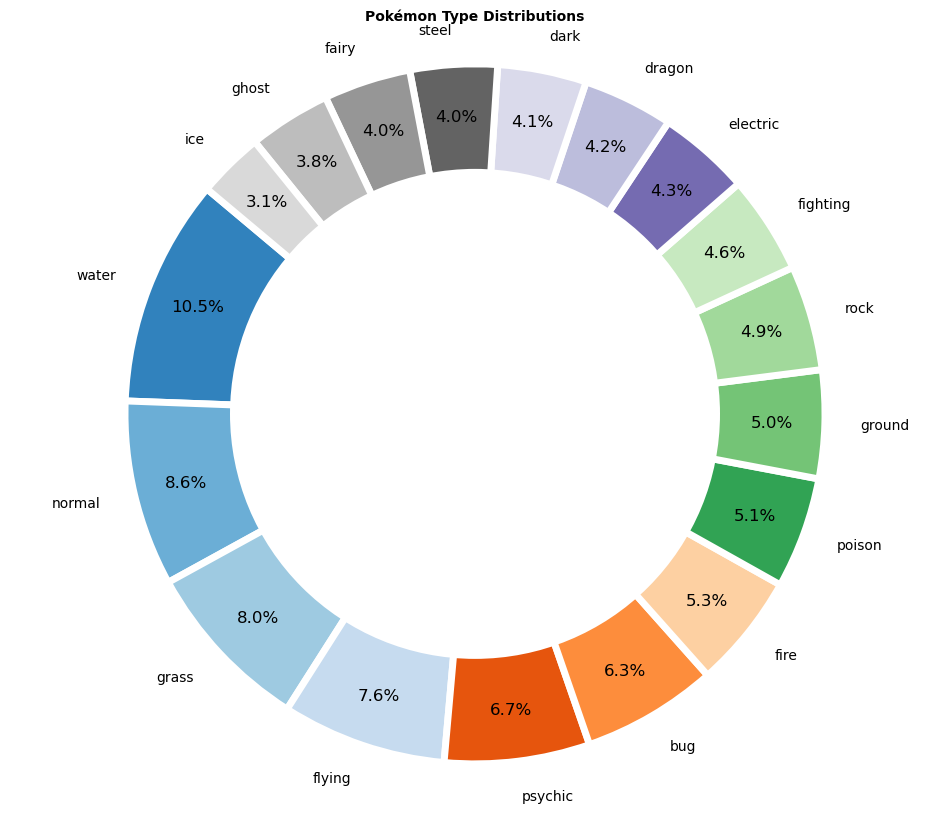

In [14]:
# Prepare data for the pie chart
type_distribution = [type for sublist in pokemon_df["Type"] for type in sublist]
type_counts = pd.Series(type_distribution).value_counts()

# Generate labels for pie chart
labels = type_counts.index

# Generate colors from colormap
colors = cm.get_cmap('tab20c', len(type_counts)).colors

# Set wedge properties
wedgeprops=dict(width=0.4, edgecolor='w', linewidth=5)

# Create a donut-like pie chart (also known as a pie chart with a hole)
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect="equal"))

# Use autopct to format the value of each label as a percentage
wedges, texts, autotexts = ax.pie(type_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85, wedgeprops=wedgeprops)

# Increase the default font size of the labels
for autotext in autotexts:
    autotext.set_fontsize(12)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Set the title of the plot
plt.title('Pokémon Type Distributions', size=10, color='black', weight='bold')

# Show the plot
plt.show()